# Setting up dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install netCDF4
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 19.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 50.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 40.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 45.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 40.1 MB/s 
  I

In [ ]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from tabulate import tabulate

data_path = 'drive/MyDrive/Stanford/CS230/Data/ClimateNet/' 

!python --version

Python 3.8.16


In [ ]:
data_path = 'drive/MyDrive/CS230/Data/ClimateNet/' 
data_path_pred = 'drive/MyDrive/CS230/Data/Pred' 


# Loading dataset

16 time steps for the years 2003 and 2004 to establish reasonable time statistics over a reasonable file size.


In [ ]:
ds = xr.open_mfdataset(data_path+'test/data-2013-09-27*') # loading all datasets for 2003-2004
# data-2011-06-03-01-1_0.nc
# data-2013-09-27-01-1_0.nc


NameError: ignored

In [ ]:
ds = xr.open_mfdataset(data_path+'test/3imgs/*') # loading all datasets for 3 imgs


In [ ]:
ds = xr.open_mfdataset(data_path_pred+'/groundTruth/*') # loading all datasets for 3 imgs


In [ ]:
O1 = '/01_L-baseline_LR-baseline_D-baseline.nc'
O2 = '/02_L-baseline_LR-scheduled_D-baseline.nc'
O3 = '/03_L-baseline_LR-scheduled_D-engr.nc'
O4 = '/04_L-crossEntropy_LR-scheduled_D-engr.nc'
O5 = '/05_L-weightedCrossEntropy_LR-scheduled_D-engr.nc'
O6 = '/06_L-weightedJaccard_LR-scheduled_D-engr.nc'

dsPred = xr.open_mfdataset(data_path_pred+O6) # loading predictions



In [ ]:
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 3)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-04-01-1.nc' ... 'data-2013-09-27-01-...
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
 

In [ ]:
print(dsPred)

<xarray.Dataset>
Dimensions:                        (lat: 768, lon: 1152, time: 2)
Coordinates:
  * lat                            (lat) float64 -90.0 -89.77 ... 89.77 90.0
  * lon                            (lon) float64 0.0 0.3125 ... 359.4 359.7
  * time                           (time) object 'data-2013-09-27-01-1.nc' 'd...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 dask.array<chunksize=(2, 768, 1152), meta=np.ndarray>


In [ ]:
print(ds["LABELS"])

<xarray.DataArray 'LABELS' (lat: 768, lon: 1152)>
dask.array<open_dataset-00d6e422de989f64cc749366d23530f7LABELS, shape=(768, 1152), dtype=int64, chunksize=(768, 1152), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
Attributes:
    description:  0: Background, 1: Tropical Cyclone, 2: Athmospheric river


In [ ]:
ds.variables

In [ ]:
def map_channel(ds, metric, lon=-80, lat=35, timesteps=[1]): # 4,8,12
    print("map_channel",ds)
    print("map_channel ds[metric]",ds[metric])
    p = ds[metric].isel(time=timesteps).plot.imshow(
      transform=ccrs.PlateCarree(),
      col="time",
      subplot_kws={"projection": ccrs.Orthographic(lon, lat)},
      aspect = 1.3, size = 8
    )

    for ax in p.axes.flat:
      ax.coastlines()
      ax.gridlines()

    plt.draw()

    return


In [ ]:
def map_channel_1(ds, metric, lon=-80, lat=35, timesteps=[0]): # ,4,8,12
    print("map_channel",ds)
    print("map_channel ds[metric]",ds[metric])
    p = ds[metric].plot.imshow(
      transform=ccrs.PlateCarree(),
      # col="time",
      # subplot_kws={"projection": ccrs.Orthographic(lon, lat)},
      aspect = 1.3, size = 8
    )

    for ax in p.axes.flat:
      ax.coastlines()
      ax.gridlines()

    plt.draw()

    return

In [ ]:
def map_channel_pred(dsP, lon=-80, lat=35, timesteps=[1]):
    print("map_channel",dsP)
    print("dsP.isel(time=timesteps)",dsP.isel(time=timesteps))
    p = dsP["__xarray_dataarray_variable__"].isel(time=timesteps).plot.imshow(
      transform=ccrs.PlateCarree(),
      col="time",
      subplot_kws={"projection": ccrs.Orthographic(lon, lat)},
      aspect = 1.3, size = 8
    )

    for ax in p.axes.flat:
      ax.coastlines()
      ax.gridlines()

    plt.draw()
    #plt.savefig("./SampleName.png")

    return



In [ ]:
map_channel_pred(dsPred)
map_channel_pred(dsPred, 100)

In [ ]:
print(ds.shape)

NameError: ignored

# Channels summary

> Description of the 16 channels from the ClimateNet dataset.


| Channel | Description                                               | Units  | 
|---------|-----------------------------------------------------------|--------|
| TMQ     | Total (vertically integrated) precipitable water          | kg/m^2 | 
| U850    | Zonal wind at 850 mbar pressure surface                   | m/s    | 
| V850    | Meridional wind at 850 mbar pressure surface              | m/s    | 
| UBOT    | Lowest level zonal wind                                   | m/s    | 
| VBOT    | Lowest model level meridional wind                        | m/s    | 
| QREFHT  | Reference height humidity                                 | kg/kg  | 
| PS      | Surface pressure                                          | Pa     | 
| PSL     | Sea level pressure                                        | Pa     |  
| T200    | temperature at 200 mbar pressure surface                  | K      | 
| T500    | temperature at 500 mbar pressure surface                  | K      | 
| PRECT   | total (convective and large-scale) precipitation rate     | m/s    |  
| TS      | surface temperature (radiative)                           | K      | 
| TREFHT  | reference height temperature                              | K      | 
| Z1000   | geopotential Z at 1000 mbar pressure surface              | m      | 
| Z200    | geopotential Z at 200 mbar pressure surface               | m      | 
| ZBOT    | lowest modal level height                                 | m      | 
| LABELS  | 0: Background, 1: Tropical Cyclone, 2: Athmospheric river | -      |  







In [ ]:
metrics = []

for idx, var in enumerate(["TMQ", "U850", "V850", "UBOT", "VBOT", "QREFHT", "PS", "PSL", "T200", "T500", "PRECT", "TS", "TREFHT", "Z1000", "Z200", "ZBOT", "LABELS"]):

    slice = getattr(ds, var).load()
    metrics.append([])

    metrics[idx].append(format(slice.name))

    # Mean
    metrics[idx].append(slice.mean())

    # Standard deviation
    metrics[idx].append(np.sqrt(slice.std()))

    # Percentiles
    metrics[idx].append(slice.quantile(0.01))
    metrics[idx].append(slice.quantile(0.05))
    metrics[idx].append(slice.quantile(0.5))
    metrics[idx].append(slice.quantile(0.95))
    metrics[idx].append(slice.quantile(0.99))

print(tabulate(metrics, headers=["Channel", "Mean", "Variance", "1%", "5%", "50%", "95%", "99%"], tablefmt='orgtbl'))




| Channel   |             Mean |     Variance |              1% |              5% |              50% |              95% |              99% |
|-----------+------------------+--------------+-----------------+-----------------+------------------+------------------+------------------|
| TMQ       |     20.2683      |  3.96126     |     0.156147    |     0.410549    |     16.193       |     49.7773      |     56.4067      |
| U850      |      1.58543     |  2.85289     |   -14.0797      |    -9.70654     |      0.571767    |     17.0036      |     24.7253      |
| V850      |      0.329674    |  2.51259     |   -17.4298      |   -10.0513      |      0.422809    |     10.4455      |     16.0255      |
| UBOT      |      0.156553    |  2.55785     |   -13.1118      |    -9.4902      |     -0.374702    |     12.2462      |     18.2145      |
| VBOT      |      0.381014    |  2.42045     |   -16.2389      |    -9.78545     |      0.563996    |      9.54114     |     13.9718      |
| QREFHT    |

# Summary statistics

> Statistics for each channel over time (2003-2004) and space (1152, 768).

| Channel   |             Mean |     Variance |              1% |              5% |              50% |              95% |              99% |
|-----------|------------------|--------------|-----------------|-----------------|------------------|------------------|------------------|
| TMQ       |     20.2683      |  3.96126     |     0.156147    |     0.410549    |     16.193       |     49.7773      |     56.4067      |
| U850      |      1.58543     |  2.85289     |   -14.0797      |    -9.70654     |      0.571767    |     17.0036      |     24.7253      |
| V850      |      0.329674    |  2.51259     |   -17.4298      |   -10.0513      |      0.422809    |     10.4455      |     16.0255      |
| UBOT      |      0.156553    |  2.55785     |   -13.1118      |    -9.4902      |     -0.374702    |     12.2462      |     18.2145      |
| VBOT      |      0.381014    |  2.42045     |   -16.2389      |    -9.78545     |      0.563996    |      9.54114     |     13.9718      |
| QREFHT    |      0.00814362  |  0.0784361   |     9.07437e-06 |     4.59722e-05 |      0.00668747  |      0.0185451   |      0.0200632   |
| PS        |  96565           | 98.8105      | 61043.4         | 68875.7         | 100755           | 102430           | 103022           |
| PSL       | 100798           | 38.324       | 96050.8         | 97525.1         | 101152           | 102520           | 103071           |
| T200      |    213.225       |  2.94297     |   191.687       |   194.487       |    216.527       |    223.589       |    227.482       |
| T500      |    253.855       |  3.56514     |   226.135       |   230.145       |    256.613       |    267.829       |    269.554       |
| PRECT     |      2.98506e-08 |  0.000401784 |     0           |     0           |      2.15286e-09 |      1.31591e-07 |      4.10584e-07 |
| TS        |    279.994       |  4.85895     |   206.976       |   221.696       |    286.614       |    302.358       |    305.013       |
| TREFHT    |    279.691       |  4.73432     |   210.297       |   224.875       |    285.915       |    301.056       |    303.187       |
| Z1000     |    475.048       | 28.8492      |    53.8389      |    58.103       |    142.085       |   2758.47        |   3643.31        |
| Z200      |  11769.4         | 25.4235      | 10314.8         | 10503.3         |  11942.8         |  12426.7         |  12507.8         |
| ZBOT      |     61.6004      |  2.20774     |    46.6781      |    50.0286      |     62.8221      |     66.4762      |     67.0366      |
| LABELS    |      0.11075     |  0.672884    |     0           |     0           |      0           |      2           |      2           |

# Labels

Looking for tropical cyclones!

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 3)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-04-01-1.nc' ... 'data-2013-09-27-01-...
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=n

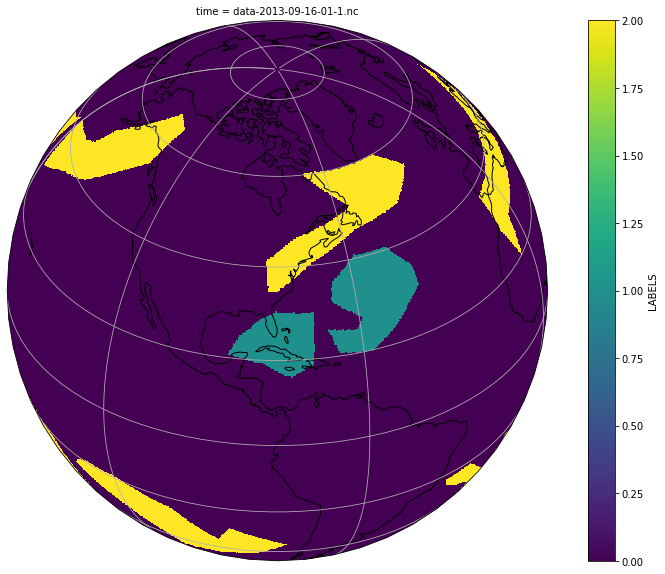

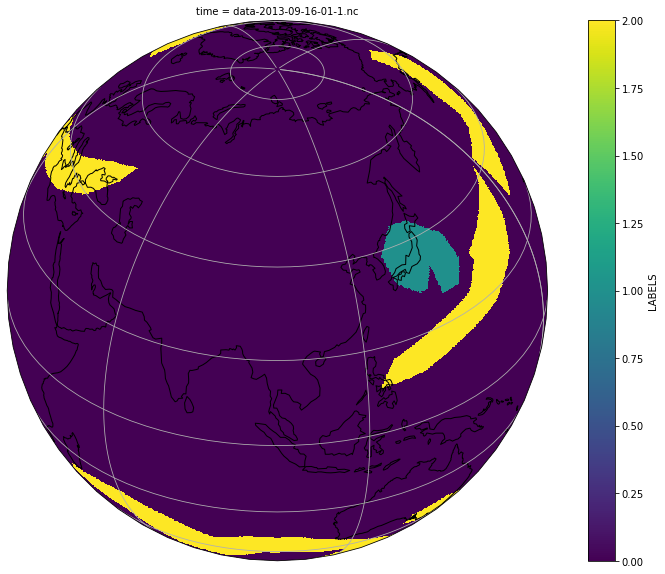

In [ ]:
map_channel(ds, "LABELS")
map_channel(ds, "LABELS", 100)

In [ ]:
map_channel_1(ds, "LABELS")
map_channel_1(ds, "LABELS", 100)

In [ ]:
map_channel_pred(dsPred)
map_channel_pred(dsPred, 100)

In [ ]:
ds.groupby("LABELS").count()



# Total precipitable water (TMQ)

Description: total (vertically integrated) precipitable water


map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

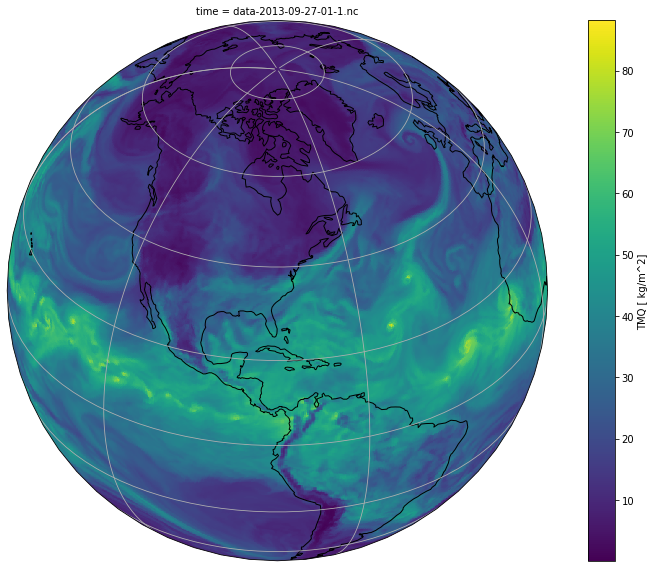

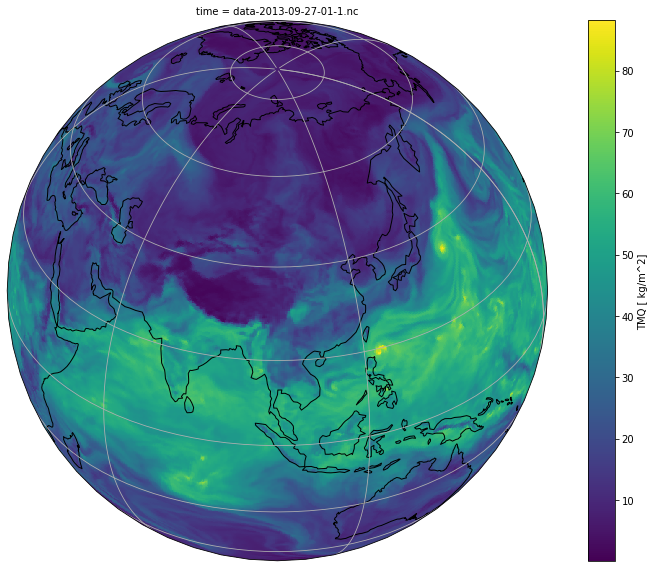

In [ ]:
map_channel(ds, "TMQ")
map_channel(ds, "TMQ", 100)

# Zonal winds at 850 hPa (U850)



map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

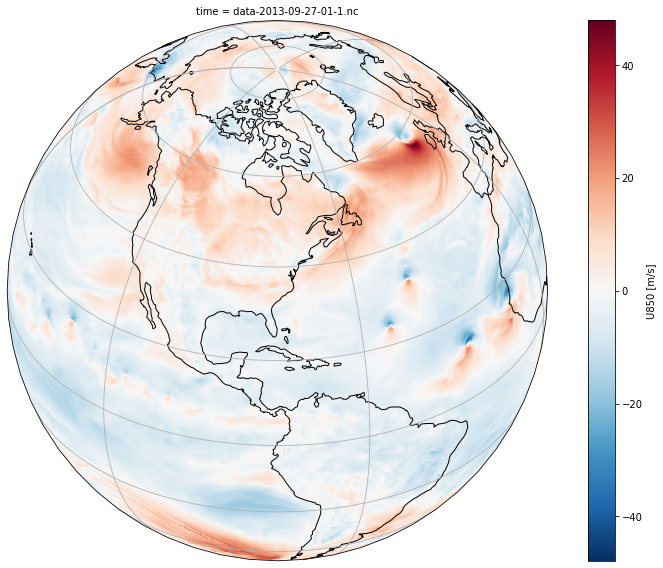

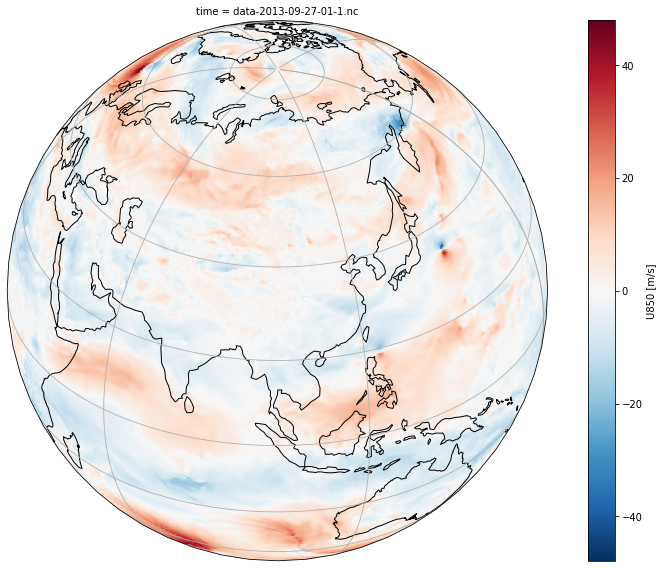

In [ ]:
map_channel(ds, "U850")
map_channel(ds, "U850", 100)

# Meridional winds at 850 hPa (V850)

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

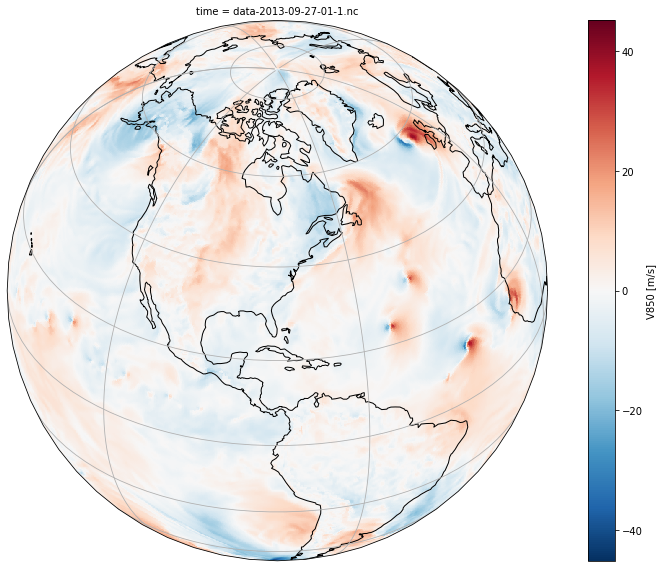

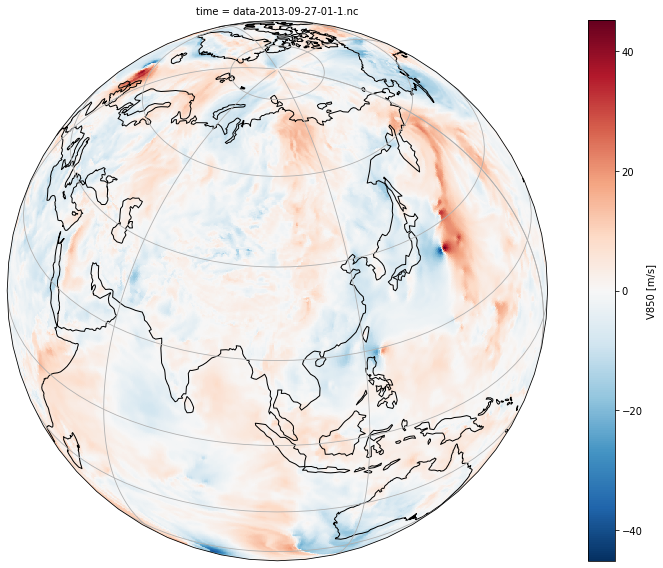

In [ ]:
map_channel(ds, "V850")
map_channel(ds, "V850", 100)

# Surface zonal winds (UBOT)

In [ ]:
map_channel(ds, "UBOT")
map_channel(ds, "UBOT", 100)

# Surface meridional winds (VBOT)

In [ ]:
map_channel(ds, "VBOT")
map_channel(ds, "VBOT", 100)

# Reference height humidity (QREFHT)

In [ ]:
map_channel(ds, "VBOT")
map_channel(ds, "VBOT", 100)

# Surface pressure (PS)

In [ ]:
map_channel(ds, "PS")
map_channel(ds, "PS", 100)

# Sea-level pressure (PSL)

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

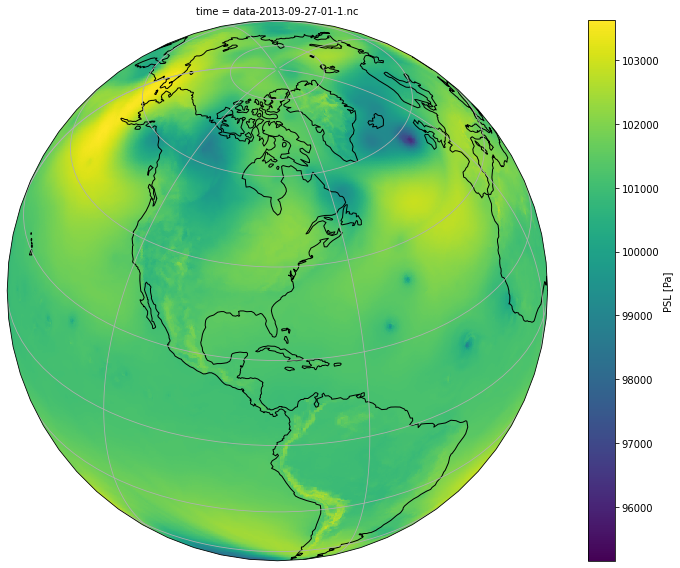

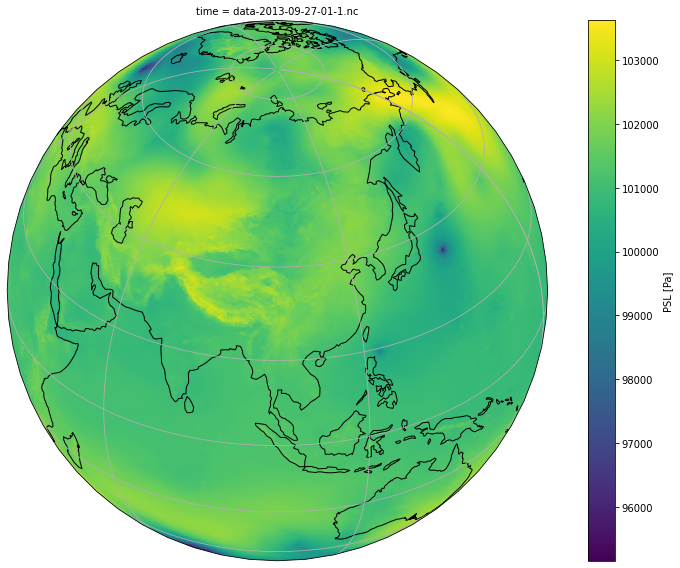

In [ ]:
map_channel(ds, "PSL")
map_channel(ds, "PSL", 100)

# T200

In [ ]:
map_channel(ds, "T200")
map_channel(ds, "T200", 100)

#T500

In [ ]:
map_channel(ds, "T500")
map_channel(ds, "T500", 100)

# PRECT

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

map_channel <xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2013-09-27-01-1.nc'
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    TREFHT   (tim

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

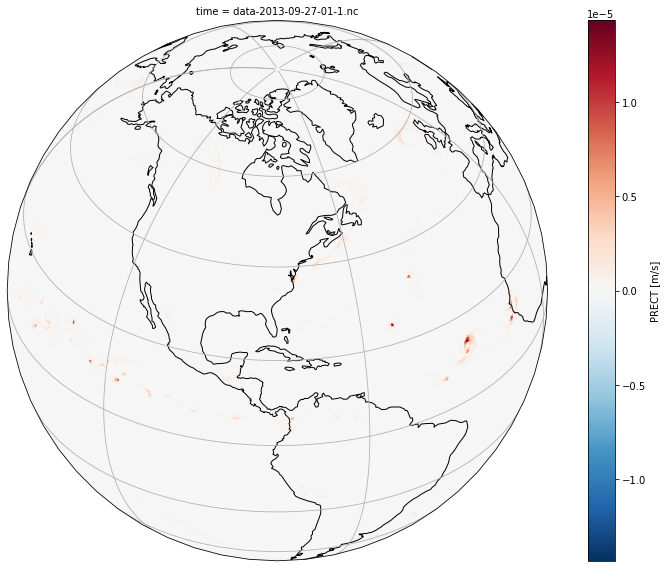

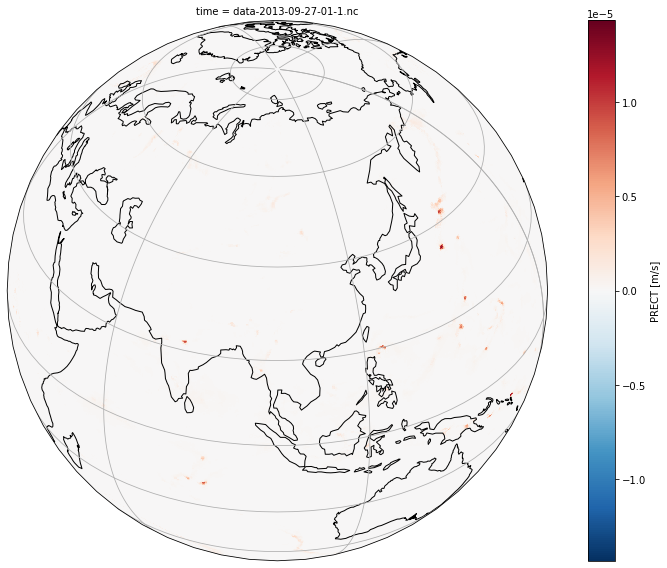

In [ ]:
map_channel(ds, "PRECT")
map_channel(ds, "PRECT", 100)

# TS

In [ ]:
map_channel(ds, "TS")
map_channel(ds, "TS", 100)

# TREFHT

In [ ]:
map_channel(ds, "TREFHT")
map_channel(ds, "TREFHT", 100)

# Z1000

In [ ]:
map_channel(ds, "Z1000")
map_channel(ds, "Z1000", 100)

# Z200

In [ ]:
map_channel(ds, "Z200")
map_channel(ds, "Z200", 100)

# ZBOT

In [ ]:
map_channel(ds, "ZBOT")
map_channel(ds, "ZBOT", 100)